# Python3 能干什么系列之 爬虫

&nbsp;&nbsp; Python3 爬虫简单入门

## Python3 爬虫简述

网络爬虫（又被称为网页蜘蛛，网络机器人，在FOAF社区中间，更经常的称为网页追逐者），是一种按照一定的规则，自动地抓取万维网信息的程序或者脚本。--[百度百科-网络爬虫](https://baike.baidu.com/item/网络爬虫/5162711)

涉及算法(深度优先搜索，广度优先搜索，最佳优先搜索)，分布式技术等。
接下来我们将展示如何使用Python3 构造一个简单优雅的爬虫。

## 准备阶段
从[Python官网](https://www.python.org/downloads/)上在下载Python3的安装程序并安装[1]()

接下来，我们开始写代码了，先确定一个小目标http://huaban.com/search/?q=动漫
http://huaban.com/robots.txt


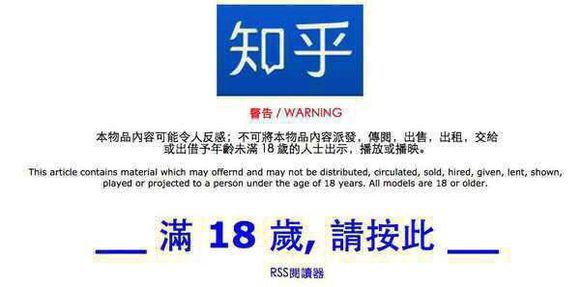



在此，首先入坑一个比较简单的爬虫。

## 开始入坑第一步

配置依赖库

In [ ]:
import re
try:
    import requests
    from bs4 import BeautifulSoup
except ImportError:
    import os
    os.system('pip install requests BeautifulSoup4')
    import requests
    from bs4 import BeautifulSoup

## 入坑第二步
先访问一个网站，在此我们访问一下百度作为演示。

In [ ]:
r=requests.get('http://www.baidu.com')
r

In [ ]:
r.encoding

In [ ]:
r.text

In [ ]:
r.cookies

到这里，你已经会了一个基本的技能————使用requests访问一个网站，接下来，我们将开始一个更加有趣的操作了。

访问花瓣的网站找找好看的图片怎么样？ Come on.

In [ ]:
r = requests.get('http://huaban.com/search/?q=动漫')
r.text

有些。。。乱，不过接下来就简单了。。。个屁啊。由于代码太过乱了。先格式一下。

In [ ]:
soup = BeautifulSoup(r.text)
print(soup.prettify())

格式化完成后，我们开始愉快的拿图片吧【坏笑】

In [ ]:
soup.find_all('img')

What？图片呢？检查代码，我们发现花瓣的图片并不是直接使用img标签进行的标记，而是使用动态渲染完成的网站绘制的，当然我们会在后文中对动态网站对爬取也会进行讲解.现在，我们要学会对整个网站进行分析。
在此，我推荐Fiddler或者Charles工具对网站数据包进行分析，不过好像都是收费的，学生党表示用不起，所以我在此将展示如何使用Firefox Develop Edition 对网站进行分析。
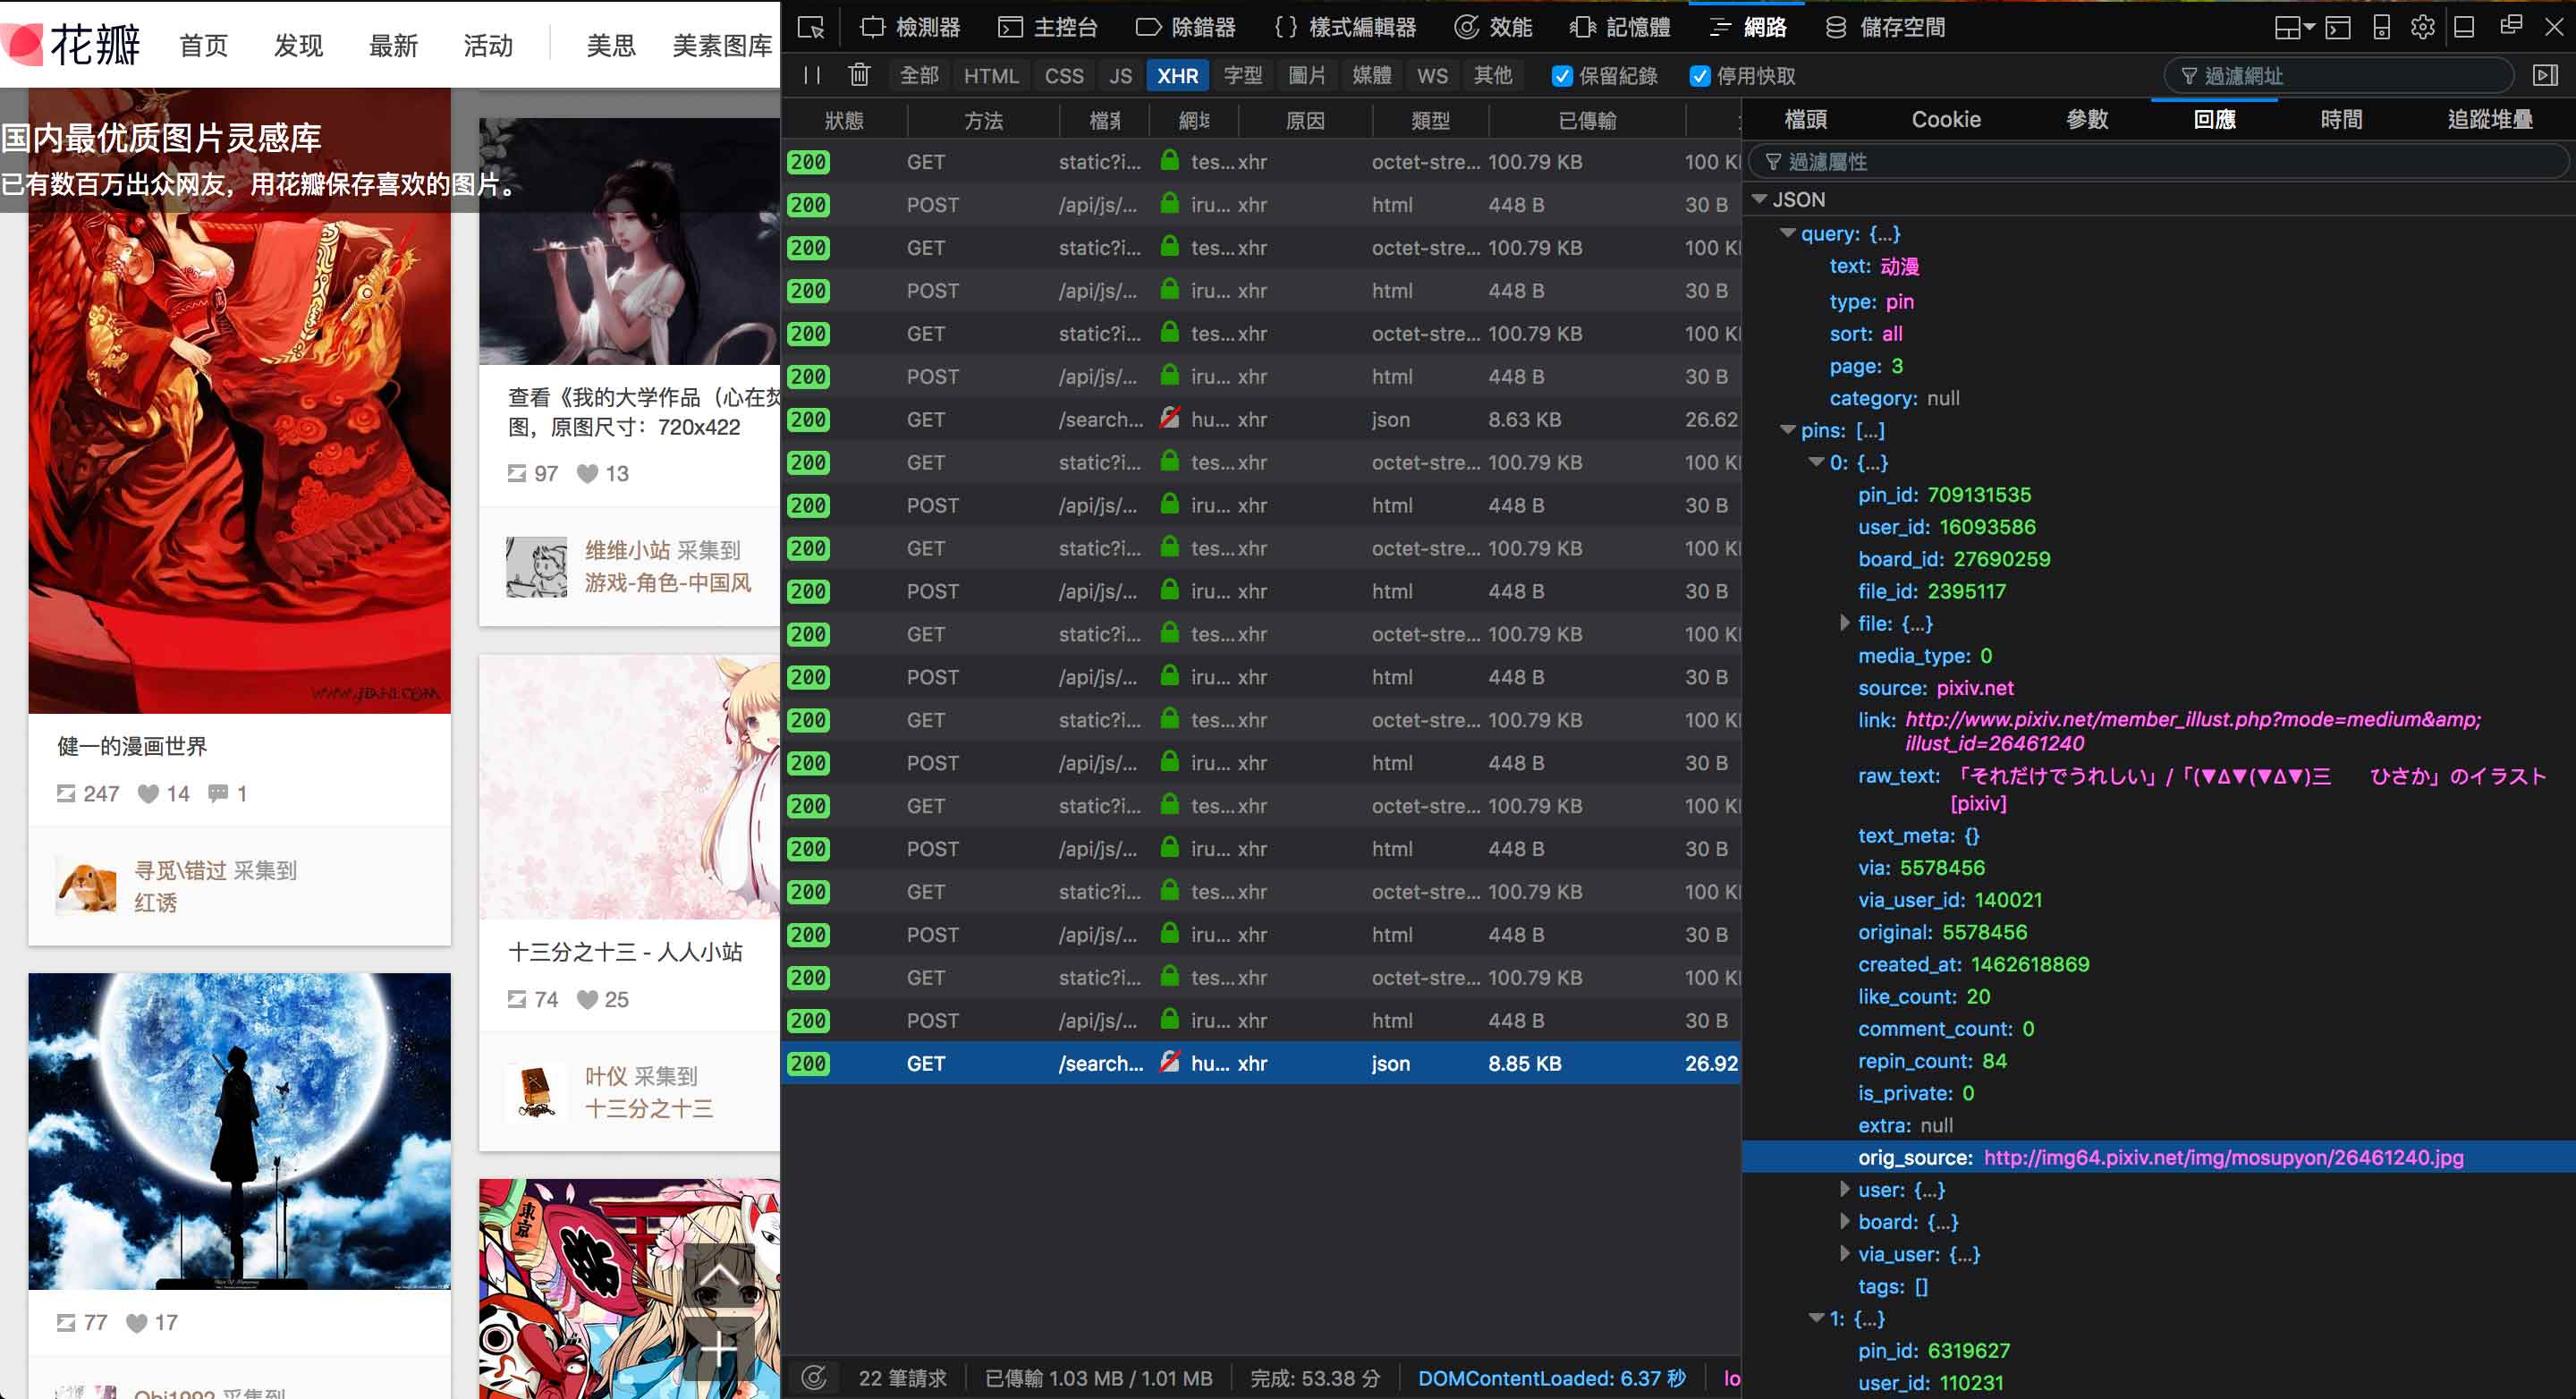

在我们把网站向下拉的过程中，我们发现它对外发出了一个特殊的GET请求，为什么说特殊呢，因为我们在爬取网站的时候一定要优先关注类型为json的数据，这里面很可能有我们想要的数据。接下来我们开始继续爬取数据。

In [ ]:
r=requests.get('http://huaban.com/search/?q=动漫&jforwzmb&page=3&per_page=20&wfl=1')
r.json()

完美报错，好，我们来看看发生了什么情况。

In [ ]:
r.text

哎？怎么又成了Html格式，不是说好了是json数据么，我们来看看请求的头数据。

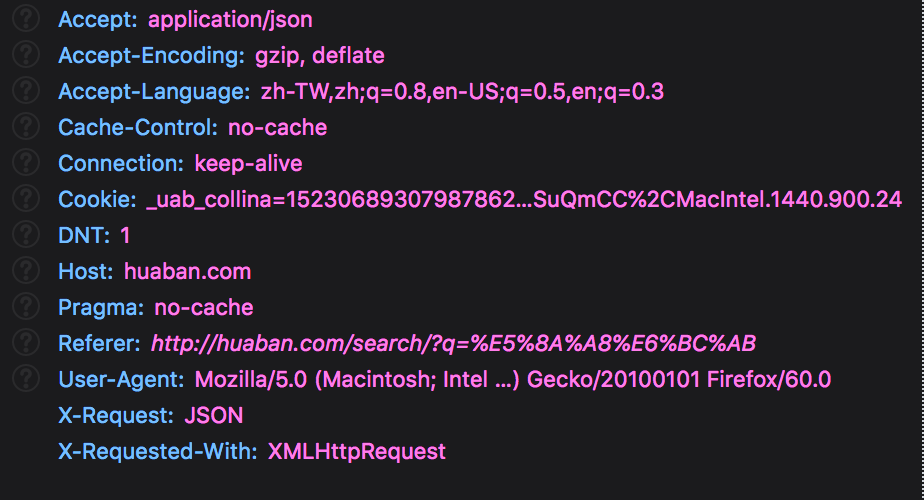

原因可能出现在这里，我们来伪装一下自己的请求。

In [ ]:
url = 'http://huaban.com/search/?q=动漫&jforwzmb&page=3&per_page=20&wfl=1'
headers = {
    'Accept':'application/json',
    'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'zh-TW,zh;q=0.8,en-US;q=0.5,en;q=0.3',
    'Cache-Control':'no-cache',
    'Connection':'keep-alive',
    'Cookie':'_uab_collina=152306893079878626149418; sid=WW0rO54m4hHfKqcFJWaSqOuS04i.atNfWGOvfAWeczU6RzWeH3gJSdVJbQ1dVo1IWQzLYqE; _f=iVBORw0KGgoAAAANSUhEUgAAADIAAAAUCAYAAADPym6aAAADaUlEQVRIic2VS2icVRTH%2F7GxjpKgMHRACEJBalHBRXVpJSpCScHHptKNqAQKGt1YCtZXtSI%2BwGotaqkYsAGh1CAWV8V7JtNC5t4vNalmoZtQpcWkQ9GBOKZN%2FLmYO5mMGacTOmN64ON7nHP5zu88JaDhtQJBWoN07UrONCv7Luyj0aWKw48dPQoSu%2FfuZc38%2FOI70ntInU1A3IR0Bun%2BVQVZOzdHIZ2mu1iseUdadxmA1JLnHUib69hccaaaBrlhdpZCOs26mRkEdBeLiyBIW5G%2BRuqK9wGkFNJXSC8ivY%2FUEUF%2BRfod6RjS9UiPIn2E9A3SRqR%2BpEGkI9Eu3XKQ6UyGL7dt42B%2FP0Pbt1NKpUBKI61FOhUj%2ByTSm0i3IL0cS6oUgZ%2BP%2Bg6kcaQtSLuj7a547i6kAlIn0gdID7QlI%2FVKC6kbySLIjuhQR4zungiSRnqu0iNITyO9hLQ%2B2o9E8DuQfkK6Jma2tSANeiQTQc5EkEpk70Yait8KEXgn0r0R5FWkzTEzaaQn4rnbIkhHBFnWU1cE8u%2Bp9cjwcGVq7Ue6Dmk01v8hpGGkO6N%2BEOk00rtID8fMvYL0WoT8OGbsw3jfFXvjdqQE6YWWgjSzR2hi8kTo7macW4m0FGQ15aoAwSUbsaT3P%2FUjSR%2FONVy6bQPBQg4L4MKJsrNTKSycw8J53GhP1c6%2FjvlpLJzCQq4WcCqFhV9wwbBwgWzyUK1%2BtAfzWSzMfjpzoE0gbiqF%2BRLOH1%2Fi9CQuPF61GbsV85ewZAA32YWFOSzsXBKMbzE%2FXbb1hyvPi%2FqTExmy%2Fi1c%2BKttIPHng1hYIJffQG5sUzm61RLBkl4sXMSN9uBcJ%2BaLOH%2B4ej4kWBiOtntwfp6TE5maf%2BTGNmH%2Bz%2FaCZPPrsXAR85%2FjwiGcH6zRW3gH85fI59MRfLwCUgYLs1j4TIp9Yr60DMSS3raDROeOY76EhbPk8htqdWNbG2bE%2FCQWjpSD4t%2Bom5H%2FDaRcPgs4P75MlyQ3lvsiGaj2VHgW5zrJhqcwP1TtkfAJFs7GTG7B%2FD3SYmmVDpzf3%2F7xi%2Fmfcb7uhsbC2zhfwMIPlalFNjyDhb%2F5zt8Xp9YJzP%2BBCw%2BWofxvuJBE%2BO%2BxsPDjxLGrYI%2BMJDczkvQ10PfhJrvq6uIo%2F%2BLcwdUHaYVcbiH%2BA1UgIDzzjh9qAAAAAElFTkSuQmCC%2CMacIntel.1440.900.24',
    'DNT':'1',
    'Host':'huaban.com',
    'Pragma':'no-cache',
    'Referer':'http://huaban.com/search/?q=%E5%8A%A8%E6%BC%AB',
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:60.0) Gecko/20100101 Firefox/60.0',
    'X-Request':'JSON',
    'X-Requested-With':'XMLHttpRequest'
}

r = requests.get(url, headers=headers)
# r.json()

OK,成功请求到json，哇咔咔咔，之后就是愉快的保存图片吧。

In [ ]:
for i in r.json()['pins']:
    print(i['orig_source'])

In [ ]:
for i in r.json()['pins']:
    try:
        name=i['orig_source'].split('/')[-1]
        ir = requests.get(i['orig_source'])
        if ir.status_code == 200:
            open('img/'+name, 'wb').write(ir.content)
    except:
        pass

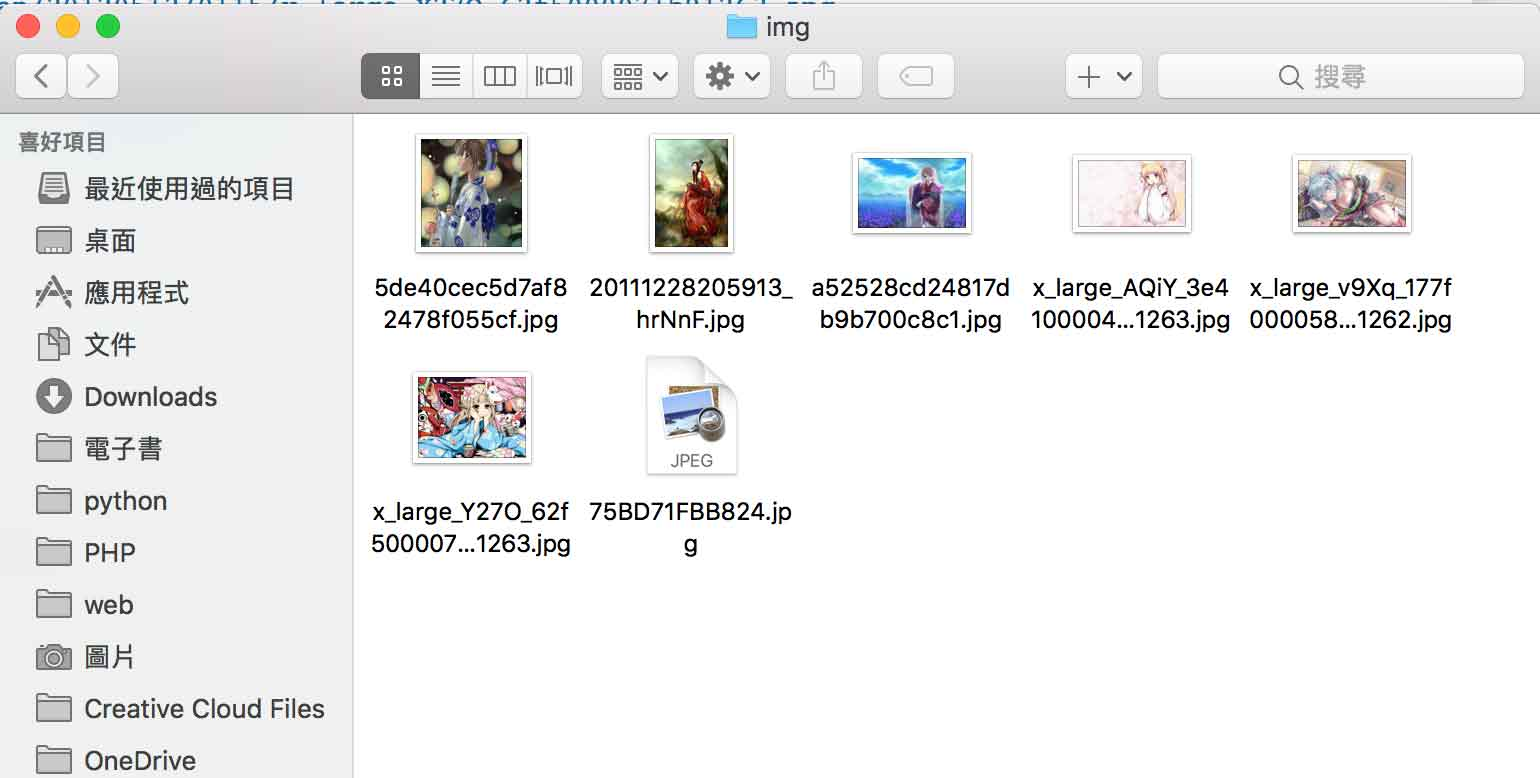

## 入坑第三步 登陆网站
因为登陆的时候属于爆破，存在不合法的行为，在此，我做了一个简单的登陆页面，代码见仓库[[4]]()里面

In [ ]:
username=open('username.txt')
password=open('password.txt')

username_=[]
password_=[]
for i in password.readlines():
    password_.append(i.rstrip("\n"))
for i in username.readlines():
    username_.append(i.rstrip("\n")) 


def dd():
    for x in username_:
    for y in password_:
        payload = {'username': x, 'password': y}
        r=requests.post('http://127.0.0.1:8000/login/',payload)
        if r.text=='success':
            print(x,y)
            return True

⚠️：此处的代码仅供本地演示使用，请勿用于真实的生产生活中

这个代码我们可以用来做爆破后台使用

未完待续 ///

#### 附注：
1. [1]在此说明推荐使用Python3的原因
3. http://docs.python-requests.org/zh_CN/latest/user/quickstart.html
5. https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html